# Prices of laptops

Price predictions of laptops based on their attributes, based on marketplace data.

### Table of Contents

* [1. Read input data](#chapter1)
* [2. Understand data structure](#chapter2)
* [3. Preprocess data with functions](#chapter3)
* [4. Train model](#chapter4)
* [5. Apply selected model on hidden data](#chapter5)


# 1. Read input data <a class="anchor" id="chapter1"></a>

In [144]:
from pathlib import Path
import os
Path.cwd()

WindowsPath('C:/Users/AiP')

In [145]:
import pandas as pd
dataset = pd.read_json("MyPythonScripts\\Project_1\\public-dataset.json")
dataset.columns


Index(['buynow_price', 'rodzaj karty graficznej', 'komunikacja',
       'rozdzielczość (piksele)', 'liczba rdzeni procesora',
       'wielkość pamięci ram', 'system operacyjny', 'typ dysku twardego',
       'sterowanie', 'multimedia', 'typ pamięci ram',
       'taktowanie bazowe procesora (ghz)', 'seria procesora', 'stan',
       'pojemność dysku (gb)', 'gwarancja', 'wielkość matrycy '],
      dtype='object')

In [146]:
display(dataset)

,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy
70,1599.0,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,1.9,intel core i3,nowy,500.0,sprzedawcy,"13"" - 13.9"""
1489,2999.0,grafika dedykowana,"[nfc (near field communication), gps]",1920 x 1080,2,12 gb,[windows 10 home],None,[touchpad],"[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.0,intel core i3,nowy,480.0,producenta,"15"" - 15.9"""
407,2999.0,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,16 gb,[windows 7 professional 64-bit],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,2.1,intel pentium dual-core,nowy,480.0,producenta,"15"" - 15.9"""
1359,2849.0,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.0,intel core i3,nowy,480.0,producenta,"15"" - 15.9"""
10567,2319.0,None,None,None,2,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10541,1329.0,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,4 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,1.6,intel celeron dual-core,nowy,128.0,sprzedawcy,"15"" - 15.9"""
8281,979.0,None,None,None,2,None,None,None,None,None,None,NaN,None,nowy,32.0,producenta,None
8053,2565.0,grafika dedykowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,4 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.3,intel core i5,nowy,128.0,sprzedawcy,"15"" - 15.9"""
8727,4079.0,grafika dedykowana,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[klawiatura, touchpad, klawiatura podświetlana]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.5,intel core i5,nowy,1128.0,producenta,"15"" - 15.9"""


In [147]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
buynow_price,7853.0,3475.527050,1730.904165,429.0,2199.0,3149.0,4399.0,15472.65
taktowanie bazowe procesora (ghz),6917.0,2.337430,0.391090,0.0,2.0,2.5,2.6,3.90
pojemność dysku (gb),7372.0,653.239826,477.616013,0.0,256.0,500.0,1000.0,10000.00


In [148]:
dataset.columns

Index(['buynow_price', 'rodzaj karty graficznej', 'komunikacja',
       'rozdzielczość (piksele)', 'liczba rdzeni procesora',
       'wielkość pamięci ram', 'system operacyjny', 'typ dysku twardego',
       'sterowanie', 'multimedia', 'typ pamięci ram',
       'taktowanie bazowe procesora (ghz)', 'seria procesora', 'stan',
       'pojemność dysku (gb)', 'gwarancja', 'wielkość matrycy '],
      dtype='object')

# 2. Understand data structure <a class="anchor" id="chapter2"></a>


### 2.0 Rename columns

In [149]:
dataset_col_ren = dataset.rename(columns={"rodzaj karty graficznej": "rodzaj_karty_graficznej", 
                                          "rozdzielczość (piksele)": "rozdzielczosc", 
                                          "liczba rdzeni procesora":"liczba_rdzeni", 
                                          "wielkość pamięci ram":"wielkosc_ram", 
                                          "system operacyjny":"system_operacyjny", 
                                          "typ dysku twardego":"typ_dysku", 
                                          "typ pamięci ram":"typ_ram", 
                                          "taktowanie bazowe procesora (ghz)":"taktowanie_ghz", 
                                          "seria procesora":"seria_procesora", 
                                          "pojemność dysku (gb)":"pojemnosc_dysku_gb", 
                                          "wielkość matrycy ":"wielkosc_matrycy"
                                         })
dataset_col_ren.columns

Index(['buynow_price', 'rodzaj_karty_graficznej', 'komunikacja',
       'rozdzielczosc', 'liczba_rdzeni', 'wielkosc_ram', 'system_operacyjny',
       'typ_dysku', 'sterowanie', 'multimedia', 'typ_ram', 'taktowanie_ghz',
       'seria_procesora', 'stan', 'pojemnosc_dysku_gb', 'gwarancja',
       'wielkosc_matrycy'],
      dtype='object')

## 2.1 Drop nulls and irrelevant columns
1. Remove rows "nie dotyczy" from liczba_rdzeni, as those records contains almost no information 
2. Remove column "stan", as only "nowy" available

In [150]:
dataset_col_ren[dataset_col_ren.liczba_rdzeni == "nie dotyczy"]

,buynow_price,rodzaj_karty_graficznej,komunikacja,rozdzielczosc,liczba_rdzeni,wielkosc_ram,system_operacyjny,typ_dysku,sterowanie,multimedia,typ_ram,taktowanie_ghz,seria_procesora,stan,pojemnosc_dysku_gb,gwarancja,wielkosc_matrycy
5422,5820.0,None,None,None,nie dotyczy,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
2052,2378.9,None,None,None,nie dotyczy,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
6261,6858.9,None,None,None,nie dotyczy,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
10911,2910.0,None,None,None,nie dotyczy,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
601,1398.9,None,None,None,nie dotyczy,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,6450.0,None,None,None,nie dotyczy,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
596,6940.0,None,None,None,nie dotyczy,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
5233,9260.0,None,None,None,nie dotyczy,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
7941,5950.0,None,None,None,nie dotyczy,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None


In [151]:
dataset_no_nd = dataset_col_ren[dataset_col_ren.liczba_rdzeni != "nie dotyczy"].drop("stan", axis = 1)


## 2.2. Handle columns of array type
komunikacja; system_operacyjny; sterowanie; multimedia

### 2.2.1. Change array_type columns to string

In [152]:
dataset_lts = dataset_no_nd 
dataset_lts['komunikacja'] = dataset_lts['komunikacja'].str.join(',')
dataset_lts['system_operacyjny'] = dataset_lts['system_operacyjny'].str.join(',')
dataset_lts['sterowanie'] = dataset_lts['sterowanie'].str.join(',')
dataset_lts['multimedia'] = dataset_lts['multimedia'].str.join(',')


### 2.2.2. Extract values from long strings

In [153]:
#dataset_lts['komunikacja'].value_counts()

In [154]:
dataset_lts_kom1 = dataset_lts
komunikacja_list = [r'(wi-fi)', r'(bluetooth)', r'(widi)', r'(nfc)', r'(modem 3g)', r'(modem 4g)', r'(lan 10/100/1000 mbps)', r'(LAN 10/100 mbps)',r'(802.11 a/b/g/n/ac)',r'(wi-fi 802.11 a/b/g/n)',r'(wi-fi 802.11 a/b/g/n)']

for i in komunikacja_list:
    dataset_lts_kom1['komunikacja_'+i] = dataset_lts_kom1['komunikacja'].str.extract(i, expand=False)
dataset_lts_kom1=dataset_lts_kom1.drop('komunikacja', axis = 1)
#display(dataset_lts_kom1)


In [155]:
#dataset_lts['sterowanie'].value_counts()

In [156]:
dataset_lts_ster1 = dataset_lts_kom1
sterowanie_list = [r'(klawiatura)', r'(numeryczna)', r'(touchpad)', r'(podświetlana)']

for i in sterowanie_list:
    dataset_lts_ster1['sterowanie_'+i] = dataset_lts_ster1['sterowanie'].str.extract(i, expand=False)
dataset_lts_ster1 = dataset_lts_ster1.drop('sterowanie', axis = 1)
#display(dataset_lts_ster1)


In [157]:
#dataset_lts['system_operacyjny'].value_counts()


In [158]:
dataset_lts_syst1 = dataset_lts_ster1
system_list = [r'(windows 7)', r'(windows 8.1)', r'(windows 10)', r'(professional)', r'(brak)']

for i in system_list:
    dataset_lts_syst1['system_'+i] = dataset_lts_syst1['system_operacyjny'].str.extract(i, expand=False)
dataset_lts_syst1 = dataset_lts_syst1.drop('system_operacyjny', axis = 1)
#display(dataset_lts_syst1)

In [159]:
#dataset_lts['multimedia'].value_counts()

In [160]:
dataset_lts_mult1 = dataset_lts_syst1
multimedia_list = [r'(czytnik)', r'(kamera)', r'(głośniki)', r'(mikrofon)']

for i in multimedia_list:
    dataset_lts_mult1['multimedia_'+i] = dataset_lts_mult1['multimedia'].str.extract(i, expand=False)
dataset_lts_mult1 = dataset_lts_mult1.drop('multimedia', axis = 1)
#display(dataset_lts_mult1)

## 2.3. Adjust column types

In [161]:
dataset_ct = dataset_lts_mult1
#print(dataset_ct.dtypes)

In [162]:
dataset_ct['wielkosc_ram_gb'] = dataset_ct['wielkosc_ram'].str.extract(r'(^\d*)', expand=False)
dataset_ct = dataset_ct.drop('wielkosc_ram', axis = 1)


## 2.4 Add new column

### 2.4.1. Rozdzielcznosc_na_cal 

In [163]:
import numpy as np
dataset_ct['rozdzielczosc_1'] = dataset_ct['rozdzielczosc'].str.extract(r'(^\d*)', expand=False).apply(pd.to_numeric, errors='coerce') 
dataset_ct['rozdzielczosc_2'] = dataset_ct['rozdzielczosc'].str.extract(r'(\d*$)', expand=False).apply(pd.to_numeric, errors='coerce')
dataset_ct['wielkosc_matrycy_num'] = dataset_ct['wielkosc_matrycy'].str.extract(r'(^\d*)', expand=False).apply(pd.to_numeric, errors='coerce')
dataset_ct['rozdzielcznosc_na_cal'] = dataset_ct.rozdzielczosc_1 * dataset_ct.rozdzielczosc_1 / dataset_ct.wielkosc_matrycy_num


dataset_ct = dataset_ct.drop(['rozdzielczosc_1','rozdzielczosc_2', 'wielkosc_matrycy_num'], axis = 1)
dataset_ct['rozdzielcznosc_na_cal_log2'] = np.log2(dataset_ct['rozdzielcznosc_na_cal'])

#display(dataset_ct[['rozdzielczosc','wielkosc_matrycy', 'rozdzielcznosc_na_cal']].sort_values(['rozdzielcznosc_na_cal'], ascending=False))
#display(dataset_ct)

#### 2.4.1.1 Check what level of logarithm to apply for long-tail rozdzielczosc_na_cal

(array([1881.,  554.,  473., 3936.,  168.,    4.,   39.,    0.,   17.,
         118.]),
 array([16.7440207 , 17.08095277, 17.41788485, 17.75481693, 18.09174901,
        18.42868108, 18.76561316, 19.10254524, 19.43947732, 19.7764094 ,
        20.11334147]),
 <a list of 10 Patch objects>)

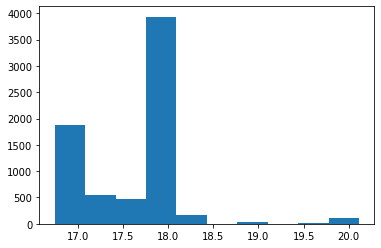

In [164]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
dataset_ct['rozdzielcznosc_na_cal_log2'] = np.log2(dataset_ct['rozdzielcznosc_na_cal'])
plt.hist(dataset_ct['rozdzielcznosc_na_cal_log2'], bins=None, range=None, density=False)

(array([1881.,  554.,  473., 3936.,  168.,    4.,   39.,    0.,   17.,
         118.]),
 array([5.04045248, 5.14187914, 5.2433058 , 5.34473246, 5.44615912,
        5.54758579, 5.64901245, 5.75043911, 5.85186577, 5.95329243,
        6.0547191 ]),
 <a list of 10 Patch objects>)

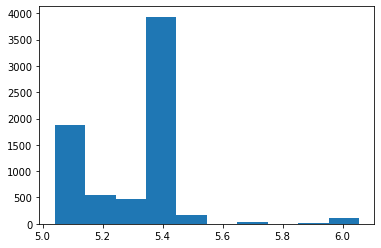

In [165]:
dataset_ct['rozdzielcznosc_na_cal_log10'] = np.log10(dataset_ct['rozdzielcznosc_na_cal'])
plt.hist(dataset_ct['rozdzielcznosc_na_cal_log10'], bins=None, range=None, density=False)

## 2.4.2. Add logarithms of 2 numerical values

In [166]:
dataset_ct = dataset_ct.astype('str')

dataset_ct[['liczba_rdzeni','wielkosc_ram_gb']] = \
dataset_ct[['liczba_rdzeni','wielkosc_ram_gb']].apply(pd.to_numeric, errors='coerce')


dataset_ct['liczba_rdzeni_log2'] = np.log2(dataset_ct['liczba_rdzeni'])
dataset_ct['wielkosc_ram_gb_log2'] = np.log2(dataset_ct['wielkosc_ram_gb'])

In [167]:

dataset_ct_col_ren = dataset_ct.astype('str')

dataset_ct_col_ren[['buynow_price','liczba_rdzeni', 'taktowanie_ghz', 'pojemnosc_dysku_gb', 'wielkosc_ram_gb', 'rozdzielcznosc_na_cal', 'rozdzielcznosc_na_cal_log2', 'liczba_rdzeni_log2', 'wielkosc_ram_gb_log2']] = \
dataset_ct_col_ren[['buynow_price','liczba_rdzeni', 'taktowanie_ghz', 'pojemnosc_dysku_gb', 'wielkosc_ram_gb', 'rozdzielcznosc_na_cal', 'rozdzielcznosc_na_cal_log2', 'liczba_rdzeni_log2', 'wielkosc_ram_gb_log2']].apply(pd.to_numeric, errors='coerce')


(array([1.270e+02, 1.728e+03, 3.263e+03, 7.990e+02, 1.128e+03, 3.480e+02,
        0.000e+00, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

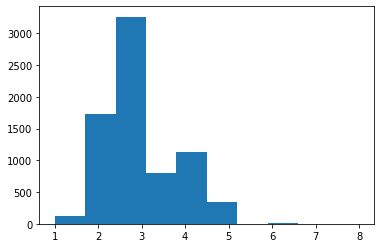

In [168]:
plt.hist(dataset_ct['wielkosc_ram_gb_log2'], bins=None, range=None, density=False)

(array([7.000e+00, 0.000e+00, 0.000e+00, 4.763e+03, 0.000e+00, 8.300e+01,
        2.907e+03, 0.000e+00, 1.000e+00, 5.000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

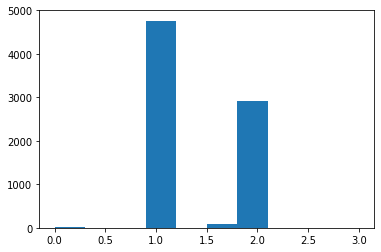

In [169]:
plt.hist(dataset_ct['liczba_rdzeni_log2'], bins=None, range=None, density=False)

In [170]:
dataset_ct_col_ren

,buynow_price,rodzaj_karty_graficznej,rozdzielczosc,liczba_rdzeni,typ_dysku,typ_ram,taktowanie_ghz,seria_procesora,pojemnosc_dysku_gb,gwarancja,...,multimedia_(czytnik),multimedia_(kamera),multimedia_(głośniki),multimedia_(mikrofon),wielkosc_ram_gb,rozdzielcznosc_na_cal,rozdzielcznosc_na_cal_log2,rozdzielcznosc_na_cal_log10,liczba_rdzeni_log2,wielkosc_ram_gb_log2
70,1599.0,grafika zintegrowana,1366 x 768,2,hdd,ddr3,1.9,intel core i3,500.0,sprzedawcy,...,czytnik,kamera,głośniki,mikrofon,8.0,143535.076923,17.131044,5.156958046384191,1.0,3.000000
1489,2999.0,grafika dedykowana,1920 x 1080,2,None,ddr4,2.0,intel core i3,480.0,producenta,...,czytnik,kamera,głośniki,mikrofon,12.0,245760.000000,17.906891,5.390511198351418,1.0,3.584963
407,2999.0,grafika zintegrowana,1366 x 768,2,ssd,ddr3l,2.1,intel pentium dual-core,480.0,producenta,...,czytnik,kamera,głośniki,mikrofon,16.0,124397.066667,16.924593,5.094810139635347,1.0,4.000000
1359,2849.0,grafika zintegrowana,1920 x 1080,2,ssd,ddr4,2.0,intel core i3,480.0,producenta,...,czytnik,kamera,głośniki,mikrofon,8.0,245760.000000,17.906891,5.390511198351418,1.0,3.000000
10567,2319.0,None,None,2,None,None,NaN,None,NaN,producenta,...,None,None,None,None,NaN,NaN,NaN,nan,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10541,1329.0,grafika zintegrowana,1366 x 768,2,ssd,ddr3,1.6,intel celeron dual-core,128.0,sprzedawcy,...,czytnik,kamera,głośniki,mikrofon,4.0,124397.066667,16.924593,5.094810139635347,1.0,2.000000
8281,979.0,None,None,2,None,None,NaN,None,32.0,producenta,...,None,None,None,None,NaN,NaN,NaN,nan,1.0,NaN
8053,2565.0,grafika dedykowana,1920 x 1080,2,ssd,ddr4,2.3,intel core i5,128.0,sprzedawcy,...,czytnik,kamera,głośniki,mikrofon,4.0,245760.000000,17.906891,5.390511198351418,1.0,2.000000
8727,4079.0,grafika dedykowana,1920 x 1080,4,ssd + hdd,ddr4,2.5,intel core i5,1128.0,producenta,...,czytnik,kamera,głośniki,mikrofon,16.0,245760.000000,17.906891,5.390511198351418,2.0,4.000000


# 3. Preprocess data with functions <a class="anchor" id="chapter3"></a>

In [171]:
#remove spaces from column names and, column "stan', and 'nie dotyczy' values from liczba_rdzeni
def fun1(df):

    df1a = df.rename(columns={"rodzaj karty graficznej": "rodzaj_karty_graficznej", 
                                          "rozdzielczość (piksele)": "rozdzielczosc", 
                                          "liczba rdzeni procesora":"liczba_rdzeni", 
                                          "wielkość pamięci ram":"wielkosc_ram", 
                                          "system operacyjny":"system_operacyjny", 
                                          "typ dysku twardego":"typ_dysku", 
                                          "typ pamięci ram":"typ_ram", 
                                          "taktowanie bazowe procesora (ghz)":"taktowanie_ghz", 
                                          "seria procesora":"seria_procesora", 
                                          "pojemność dysku (gb)":"pojemnosc_dysku_gb", 
                                          "wielkość matrycy ":"wielkosc_matrycy"
                                         })
    df1 = df1a[df1a.liczba_rdzeni != "nie dotyczy"].drop("stan", axis = 1)
    return df1   

In [172]:
#array - type column to separate columns

def fun2(dfa):
    dfa['komunikacja'] = dfa['komunikacja'].str.join(',')
    dfa['system_operacyjny'] = dfa['system_operacyjny'].str.join(',')
    dfa['sterowanie'] = dfa['sterowanie'].str.join(',')
    dfa['multimedia'] = dfa['multimedia'].str.join(',')


    dfa1 = dfa
    komunikacja_lista = [r'(wi-fi)', r'(bluetooth)', r'(widi)', r'(nfc)', r'(modem 3g)', r'(modem 4g)', r'(lan 10/100/1000 mbps)', r'(LAN 10/100 mbps)',r'(802.11 a/b/g/n/ac)',r'(wi-fi 802.11 a/b/g/n)',r'(wi-fi 802.11 a/b/g/n)']
    for i in komunikacja_lista:
        dfa1['komunikacja_'+i] = dfa1['komunikacja'].str.extract(i, expand=False)
    dfa1=dfa1.drop('komunikacja', axis = 1)



    dfa2 = dfa1
    sterowanie_lista = [r'(klawiatura)', r'(numeryczna)', r'(touchpad)', r'(podświetlana)']
    for i in sterowanie_lista:
        dfa2['sterowanie_'+i] = dfa2['sterowanie'].str.extract(i, expand=False)
    dfa2 = dfa2.drop('sterowanie', axis = 1)



    dfa3 = dfa2
    system_lista = [r'(windows 7)', r'(windows 8.1)', r'(windows 10)', r'(professional)', r'(brak)']
    for i in system_lista:
        dfa3['system_'+i] = dfa3['system_operacyjny'].str.extract(i, expand=False)
    dfa3 = dfa3.drop('system_operacyjny', axis = 1)



    dfa4 = dfa3
    multimedia_lista = [r'(czytnik)', r'(kamera)', r'(głośniki)', r'(mikrofon)']
    for i in multimedia_lista:
        dfa4['multimedia_'+i] = dfa4['multimedia'].str.extract(i, expand=False)
    dfa4 = dfa4.drop('multimedia', axis = 1)

    return dfa4

In [173]:
# wielkosc_ram to numeric
def fun3(dfb):
    dfb1 = dfb
    dfb1['wielkosc_ram_gb'] = dfb1['wielkosc_ram'].str.extract(r'(^\d*)', expand=False)
    dfb1 = dfb.drop('wielkosc_ram', axis = 1)
    return dfb1

In [174]:
#rozdzielczość na cal
def fun4(dfc):
    dfc1 = dfc
    dfc1['rozdzielczosc_1'] = dfc1['rozdzielczosc'].str.extract(r'(^\d*)', expand=False).apply(pd.to_numeric, errors='coerce') 
    dfc1['rozdzielczosc_2'] = dfc1['rozdzielczosc'].str.extract(r'(\d*$)', expand=False).apply(pd.to_numeric, errors='coerce')
    dfc1['wielkosc_matrycy_num'] = dfc1['wielkosc_matrycy'].str.extract(r'(^\d*)', expand=False).apply(pd.to_numeric, errors='coerce')
    dfc1['rozdzielcznosc_na_cal'] = dfc1.rozdzielczosc_1 * dfc1.rozdzielczosc_1 / dfc1.wielkosc_matrycy_num


    dfc1 = dfc1.drop(['rozdzielczosc_1','rozdzielczosc_2', 'wielkosc_matrycy_num'], axis = 1)
    dfc1['rozdzielcznosc_na_cal_log2'] = np.log2(dfc1['rozdzielcznosc_na_cal'])
    return dfc1

In [175]:
#logarithms of liczba rdzeni i wielkosc ram
def fun5(dfd):
    dfd1 = dfd
    dfd1 = dfd1.astype('str')

    dfd1[['liczba_rdzeni','wielkosc_ram_gb']] = \
    dfd1[['liczba_rdzeni','wielkosc_ram_gb']].apply(pd.to_numeric, errors='coerce')


    dfd1['liczba_rdzeni_log2'] = np.log2(dfd1['liczba_rdzeni'])
    dfd1['wielkosc_ram_gb_log2'] = np.log2(dfd1['wielkosc_ram_gb'])
    return dfd1

In [176]:
#change data type
def fun6(dfe):
    dfe1 = dfe

    dfe1 = dfe1.astype('str')
    
    dfe1[['buynow_price','liczba_rdzeni', 'taktowanie_ghz', 'pojemnosc_dysku_gb', 'wielkosc_ram_gb', 'rozdzielcznosc_na_cal', 'rozdzielcznosc_na_cal_log2', 'liczba_rdzeni_log2', 'wielkosc_ram_gb_log2']] = \
    dfe1[['buynow_price','liczba_rdzeni', 'taktowanie_ghz', 'pojemnosc_dysku_gb', 'wielkosc_ram_gb', 'rozdzielcznosc_na_cal', 'rozdzielcznosc_na_cal_log2', 'liczba_rdzeni_log2', 'wielkosc_ram_gb_log2']].apply(pd.to_numeric, errors='coerce')
    return dfe1


In [177]:
#combine all steps into one function
def fun_data_prep(dfz):
    dfz1 = fun1(dfz)
    dfz2 = fun2(dfz1)
    dfz3 = fun3(dfz2)
    dfz4 = fun4(dfz3)
    dfz5 = fun5(dfz4)
    dfz6 = fun6(dfz5)
    return dfz6

# 4. Train model <a class="anchor" id="chapter4"></a>

## 4.1. Data preparation for model training (pipeline)

In [178]:
dataset_cleaned = fun_data_prep(dataset)

Catergorical values: encode, Numerical values: remove nan, standarize

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [180]:
numeric_features = dataset_cleaned.select_dtypes(include=['int64', 'float64']).drop(['buynow_price'], axis=1).columns

categorical_features = dataset_cleaned.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


## 4.2. Train and test on dataset

In [181]:
from sklearn.model_selection import train_test_split

X = dataset_cleaned.drop('buynow_price', axis=1)
y = dataset_cleaned['buynow_price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [182]:
dataset_prepared = preprocessor.fit_transform(dataset_cleaned)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.fit_transform(X_test)


### 4.2.1. Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression
lin_reg = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LinearRegression())])

lin_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [184]:
from sklearn.metrics import mean_squared_error
y_pred_tt_lg = lin_reg.predict(X_test)
tt_lg_mse = mean_squared_error(y_test, y_pred_tt_lg)
tt_lg_rsme = np.sqrt(tt_lg_mse)
tt_lg_rsme

822.1018144336684

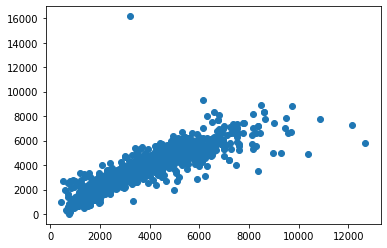

In [185]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#dataset['buynow_price'].value_counts().plot(kind='bar')

plt.scatter(y_test, y_pred_tt_lg, s=None, c=None, marker=None)

### 4.2.2. Random Forest Classifier

In [186]:
from sklearn.ensemble import RandomForestRegressor

rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestRegressor())])

In [187]:
rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [188]:
y_pred = rf.predict(X_test)

In [189]:

rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

509.62475378514756

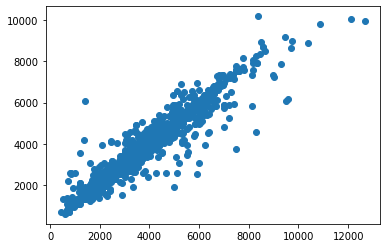

In [190]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#dataset['buynow_price'].value_counts().plot(kind='bar')

plt.scatter(y_test, y_pred, s=None, c=None, marker=None)


## 4.3. Cross-validation
note: 5 minutes to update cross_val Random Forest Regressor

#### 4.3.1. Linear regression with cross-validation

In [191]:
from sklearn.model_selection import cross_val_score
scores_lin_reg = cross_val_score(LinearRegression(), X_train_prep, y_train, scoring = 'neg_mean_squared_error', cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores_lin_reg)

def display_scores(sc):
    print("Outputs:", sc)
    print("Average:", sc.mean())
    print("Std deviation", sc.std())

display_scores(lin_reg_rmse_scores)

Outputs: [789.79755557 930.79995222 696.94746751 730.76935916 756.20306287
 784.46904241 658.65322367 855.98007341 775.02827223 896.59534739]
Average: 787.5243356445393
Std deviation 81.42193311142849


#### 4.3.2. RandomForestRegressor with cross-validation

In [ ]:

cv_rf_scores = cross_val_score(RandomForestRegressor(), X_train_prep, y_train, scoring = 'neg_mean_squared_error', cv = 10)
cv_rf_rmse_scores = np.sqrt(-cv_rf_scores)
cv_rf_rmse_scores

In [116]:
display_scores(cv_rf_rmse_scores)

Wyniki: [474.54371404 684.03610326 593.63076184 560.25603607 551.03720187
 519.05536866 437.08649507 551.51640912 588.27195466 651.06478591]
Średnia: 561.0498830492832
Odchylenie standardowe 70.59489862808685


## 4.4. Improve model

### 4.4.1. Remove irrelevatnt features

In [117]:
importances = list(rf.steps[1][1].feature_importances_)
feature_list = list(X.columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sterowanie_(touchpad) Importance: 0.07
Variable: rozdzielczosc        Importance: 0.06
Variable: komunikacja_(widi)   Importance: 0.05
Variable: liczba_rdzeni        Importance: 0.03
Variable: typ_dysku            Importance: 0.03
Variable: pojemnosc_dysku_gb   Importance: 0.03
Variable: typ_ram              Importance: 0.02
Variable: taktowanie_ghz       Importance: 0.02
Variable: rodzaj_karty_graficznej Importance: 0.01
Variable: seria_procesora      Importance: 0.01
Variable: wielkosc_matrycy     Importance: 0.01
Variable: komunikacja_(wi-fi)  Importance: 0.01
Variable: komunikacja_(802.11 a/b/g/n/ac) Importance: 0.01
Variable: system_(professional) Importance: 0.01
Variable: multimedia_(czytnik) Importance: 0.01
Variable: gwarancja            Importance: 0.0
Variable: komunikacja_(bluetooth) Importance: 0.0
Variable: komunikacja_(nfc)    Importance: 0.0
Variable: komunikacja_(modem 3g) Importance: 0.0
Variable: komunikacja_(modem 4g) Importance: 0.0
Variable: komunikacja_

In [118]:
important_columns = ['sterowanie_(touchpad)',
               'rozdzielczosc',
              'komunikacja_(widi)',
              'liczba_rdzeni',
              'typ_dysku',
              'pojemnosc_dysku_gb',
              'typ_ram',
              'taktowanie_ghz',
              'rodzaj_karty_graficznej',
              'seria_procesora',
              'gwarancja',
              'wielkosc_matrycy',
              'komunikacja_(802.11 a/b/g/n/ac)',
              'system_(windows 10)',
              'multimedia_(czytnik)',
              'komunikacja_(nfc)', 
               ]

In [119]:
X_important = X.loc[:, important_columns]
X_train_important = X_train.loc[:, important_columns]
X_test_important = X_test.loc[:, important_columns]



In [120]:
#Pipieline adjusted to work with important columns only
#.drop(['buynow_price'] no longer needed (as we refer to X)
numeric_features1 = X_important.select_dtypes(include=['int64', 'float64']).columns

categorical_features1 = X_important.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features1),
        ('cat', categorical_transformer, categorical_features1)])

In [121]:
rf_most_important = Pipeline(steps=[('preprocessor', preprocessor1), ('classifier', RandomForestRegressor())])

In [122]:
rf_most_important.fit(X_train_important, y_train)
y_pred_most_important = rf_most_important.predict(X_test_important)

In [123]:
rfmi_mse = mean_squared_error(y_test, y_pred_most_important)
rfmi_rmse = np.sqrt(rf_mse)
rfmi_rmse

515.9424578726572

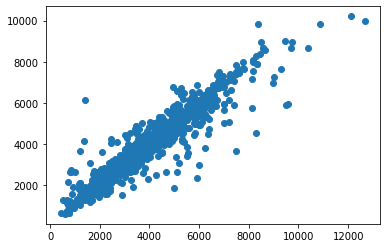

In [124]:
plt.scatter(y_test, y_pred, s=None, c=None, marker=None)

Cross validation

In [125]:
X_train_important_prep = preprocessor1.fit_transform(X_train_important)

cv_rfmi_scores = cross_val_score(RandomForestRegressor(), X_train_important_prep, y_train, scoring = 'neg_mean_squared_error', cv = 10)
cv_rfmi_rmse_scores = np.sqrt(-cv_rfmi_scores)
cv_rfmi_rmse_scores

array([624.18030321, 840.9446653 , 695.79784016, 664.35443965,
       653.05675993, 604.83105453, 601.80893729, 647.99091354,
       715.96499332, 818.80766048])

In [126]:
display_scores(cv_rfmi_rmse_scores)

Wyniki: [624.18030321 840.9446653  695.79784016 664.35443965 653.05675993
 604.83105453 601.80893729 647.99091354 715.96499332 818.80766048]
Średnia: 686.7737567413045
Odchylenie standardowe 79.45459152855491


In [127]:
importances1 = list(rf_most_important.steps[1][1].feature_importances_)
feature_list1 = list(X_important.columns)

feature_importances1 = [(feature1, round(importance1, 2)) for feature1, importance1 in zip(feature_list1, importances1)]

feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances1];

Variable: komunikacja_(widi)   Importance: 0.26
Variable: sterowanie_(touchpad) Importance: 0.08
Variable: rozdzielczosc        Importance: 0.06
Variable: taktowanie_ghz       Importance: 0.04
Variable: system_(windows 10)  Importance: 0.02
Variable: seria_procesora      Importance: 0.01
Variable: wielkosc_matrycy     Importance: 0.01
Variable: liczba_rdzeni        Importance: 0.0
Variable: typ_dysku            Importance: 0.0
Variable: pojemnosc_dysku_gb   Importance: 0.0
Variable: typ_ram              Importance: 0.0
Variable: rodzaj_karty_graficznej Importance: 0.0
Variable: gwarancja            Importance: 0.0
Variable: komunikacja_(802.11 a/b/g/n/ac) Importance: 0.0
Variable: multimedia_(czytnik) Importance: 0.0
Variable: komunikacja_(nfc)    Importance: 0.0


## 4.5. Apply hyperparameters

In [128]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [129]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees 
n_estimators = [3, 10, 30, 300, 500, 1000, 1500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Max number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
max_depth.append(None)
# Min number of samples required to split a node
min_samples_split = [2, 5, 10]
# Min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [3, 10, 30, 300, 500, 1000, 1500]}


In [130]:

# create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_prep, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 78.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 136.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [131]:
best_random = rf_random.best_estimator_

In [ ]:

#random_accuracy = evaluate(best_random, X_train_prep, y_train)

X_test_prep
predictions = rf_random.predict(X_test_prep)
rf_random_mse = mean_squared_error(y_test, predictions)
rf_random_rmse = np.sqrt(rf_random_mse)
rf_random_rmse

# Conclusion
To improve model there have been following steps applied:

1) Data engeenering: add new column: rozdzielczosc_na_cal (liczba pikseli na cal ekranu), adding logarithmic values

2) Testing different models

3) Testing columns reduction

The best model according to cross validation is <b>Random Forest Regression</b> without columns reduction (RMSE average:566 for 10 folds, std_dev:74)

# 5. Apply selected model on hidden data <a class="anchor" id="chapter5"></a>

In [ ]:
import pandas as pd
h_dataset = pd.read_json("MyPythonScripts\\Project_1\\hidden-Xs.json")
h_dataset.columns

In [ ]:
h_dataset

## 5.1. Transform data preparation process into functions

In [ ]:
#change data type, not include Y value ('buynow_price')
def fun99(dfe):
    dfe1 = dfe

    dfe1 = dfe1.astype('str')
    
    #'buynow_price' removed from list below, because in new 'Hidden data' it's unavailable
    dfe1[['liczba_rdzeni', 'taktowanie_ghz', 'pojemnosc_dysku_gb', 'wielkosc_ram_gb', 'rozdzielcznosc_na_cal', 'rozdzielcznosc_na_cal_log2', 'liczba_rdzeni_log2', 'wielkosc_ram_gb_log2']] = \
    dfe1[['liczba_rdzeni', 'taktowanie_ghz', 'pojemnosc_dysku_gb', 'wielkosc_ram_gb', 'rozdzielcznosc_na_cal', 'rozdzielcznosc_na_cal_log2', 'liczba_rdzeni_log2', 'wielkosc_ram_gb_log2']].apply(pd.to_numeric, errors='coerce')
    return dfe1


In [ ]:
#combine all steps into one function
def fun_data_prep_test(dfy):
    dfy1 = fun1(dfy)
    dfy2 = fun2(dfy1)
    dfy3 = fun3(dfy2)
    dfy4 = fun4(dfy3)
    dfy5 = fun5(dfy4)
    dfz6 = fun99(dfy5)
    return dfz6

## 5.2. Apply selected model

In [ ]:
h_dataset_prep = fun_data_prep_test(h_dataset)
h_dataset_prep.columns

In [ ]:
y_output = rf.predict(h_dataset_prep)

In [ ]:
y_output

## 5.3. Save to json file

In [ ]:
import codecs, json

list_output = y_output.tolist()
json_str = json.dumps(list_output)

In [ ]:
import codecs, json


l_output = y_output.tolist() 

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(l_output, f, ensure_ascii=False, separators=(',', ':'), sort_keys=True, indent=4)

In [ ]:
yy = pd.read_json("data.json")
display(yy)
